In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
import glob

In [3]:
arr=[]
path = '/home/mohit/Desktop/ml project mustafi sir/pos/*.txt'
files = glob.glob(path)
for name in files:
    with open(name) as f:
     arr.append(f.read())       
   

In [4]:
len(arr)

1000

In [5]:
arr2=[]
path = '/home/mohit/Desktop/ml project mustafi sir/neg/*.txt'
file = glob.glob(path)
for name in file:
    with open(name) as f:
        #print("p")
        arr2.append(f.read())       
   

In [6]:
len(arr2)

1000

In [7]:
df = pd.DataFrame(arr,columns=['text'])
n=100

In [8]:
df = df.head(n)

In [9]:
df1 = pd.DataFrame(arr2,columns=['text'])

In [10]:
df1 = df.head(n)

In [11]:
df = df.append(df1)

In [12]:
df.shape

(200, 1)

In [13]:
df.reset_index(drop=True,inplace=True)

In [14]:
df.head(5)

,text
0,"after a rather disappointing "" mary railly "" ,..."
1,look back at all the times in your life when t...
2,it must be tough to be a mob boss . \njust ask...
3,"capsule : earthy , experimental , difficult , ..."
4,"when jim henson passed away , he left behind d..."


In [15]:
#remove email id
def rem_email(col):
    text=col[0]
    text=re.sub(r'\S*@\S*\s?',"",text)
    return text
df['text']=df[['text']].apply(rem_email,axis=1)

In [16]:
#removal of special characters
def rem_special(col):
    text=col[0]
    text=re.sub(r'[^A-Za-z0-9]+'," ",text)
    return text
df['text']=df[['text']].apply(rem_special,axis=1)

In [17]:
def rem_dig(col):
    text=col[0]
    text=re.sub(r'\d+',"",text)
    return text
df['text']=df[['text']].apply(rem_dig,axis=1)

In [18]:
#conversion to lowercase
def con_tolower(col):
    text=col[0]
    text=text.lower()
    return text
df['text']=df[['text']].apply(con_tolower,axis=1)

In [19]:
df.head(20)

,text
0,after a rather disappointing mary railly steph...
1,look back at all the times in your life when t...
2,it must be tough to be a mob boss just ask pau...
3,capsule earthy experimental difficult shocking...
4,when jim henson passed away he left behind div...
5,synopsis in this movie steven spielberg one of...
6,quiz show an almost perfectly accurate true st...
7,the first thing you notice about this movie is...
8,plot a group of asbestos cleaners get a job re...
9,the coen brothers are back again this time wit...


In [20]:
from nltk.corpus import stopwords
set1=set(stopwords.words('english'))

In [ ]:
def capping(col):
   text=col[0]
    text_new=[]
    for i in text:
        if(len(i)<=2 or len(i)>=15):
            continue
        else:
            text_new.append(i)
    return text_new
df['text']=df[['text']].apply(capping,axis=1)

In [21]:
from nltk.tokenize import word_tokenize
def stop_words1(col):
    text=col[0]
    word_tokens = word_tokenize(text)
    filtered=[]
    for i in range(0,len(word_tokens)-1):
        temp1=word_tokens[i];
        temp2=word_tokens[i+1];
        if temp1 in set1 and temp2 in set1:
            continue
        filtered.append((temp1,temp2])
    return filtered
df['text']=df[['text']].apply(stop_words1,axis=1)

In [22]:
df['text'].head()

0    [(a, rather), (rather, disappointing), (disapp...
1    [(look, back), (back, at), (the, times), (time...
2    [(it, must), (must, be), (be, tough), (tough, ...
3    [(capsule, earthy), (earthy, experimental), (e...
4    [(when, jim), (jim, henson), (henson, passed),...
Name: text, dtype: object

In [23]:
# def capping(col):
#     text=col[0]
#     text_new=[]
#     for i in text:
#         if(len(i)<=2 or len(i)>=15):
#             continue
#         else:
#             text_new.append(i)
#     return text_new
# df['text']=df[['text']].apply(capping,axis=1)

In [23]:
set1=set()
def push_in_set(col):
    text=col[0]
    set1.update(text)
df[['text']].apply(push_in_set,axis=1)

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
170    None
171    None
172    None
173    None
174    None
175    None
176    None
177    None
178    None
179    None
180    None
181    None
182    None
183    None
184    None
185    None
186    None
187    None
188    None
189    None
190    None
191    None
192    None
193    None
194    None
195    None
196    None
197    None
198    None
199    None
Length: 200, dtype: object

In [25]:
(set1)

{('scene', 'where'),
 ('the', 'meat'),
 ('to', 'warm'),
 ('frasier', 'as'),
 ('wife', 'was'),
 ('clone', 'it'),
 ('brothers', 'is'),
 ('the', 'shoulder'),
 ('hard', 'work'),
 ('thousand', 'other'),
 ('computers', 'the'),
 ('de', 'lodgerley'),
 ('body', 'isn'),
 ('the', 'taste'),
 ('interesting', 'is'),
 ('you', 'see'),
 ('s', 'troubles'),
 ('more', 'intense'),
 ('violet', 'seeds'),
 ('weird', 'hummm'),
 ('like', 'all'),
 ('away', 'but'),
 ('concerning', 'the'),
 ('the', 'nastiness'),
 ('of', 'paper'),
 ('without', 'compromise'),
 ('not', 'stop'),
 ('the', 'incinerating'),
 ('san', 'giacomo'),
 ('as', 'citizen'),
 ('no', 'make'),
 ('paranoia', 'during'),
 ('boxing', 'scene'),
 ('this', 'man'),
 ('leonard', 'novel'),
 ('mind', 'it'),
 ('effective', 'and'),
 ('they', 'repeat'),
 ('stores', 'because'),
 ('dedicates', 'their'),
 ('ending', 'which'),
 ('hopes', 'of'),
 ('a', 'lost'),
 ('the', 'drug'),
 ('visuals', 'cry'),
 ('she', 'pricks'),
 ('time', 'as'),
 ('your', 'life'),
 ('story', 'bo

In [26]:
mat=np.zeros([df.shape[0],len(set1)])

In [27]:
mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
d=dict()
k=0;
for i in set1:
    d[i]=k
    k=k+1


In [29]:
d

{'oddly': 0,
 'recently': 1,
 'snoop': 2,
 'lizard': 3,
 'devlish': 7528,
 'ridicule': 4575,
 'industrial': 4576,
 'debate': 2304,
 'tragicomic': 4,
 'anarchic': 4577,
 'inserted': 4578,
 'johnson': 4579,
 'eloquent': 4580,
 'getting': 5,
 'nina': 9008,
 'talked': 6,
 'authored': 7,
 'triumphs': 7070,
 'break': 4581,
 'enjoyable': 4583,
 'assist': 8,
 'bravo': 8928,
 'activities': 9,
 'dancer': 4587,
 'miraculous': 6966,
 'scientists': 10,
 'resumes': 7308,
 'classes': 4588,
 'gripping': 11,
 'eats': 8295,
 'take': 12,
 'assume': 13,
 'dreamworks': 4591,
 'coats': 4592,
 'anxiety': 15,
 'duffle': 4593,
 'lifelike': 4594,
 'choose': 4595,
 'pincus': 4596,
 'stir': 16,
 'locations': 6821,
 'nerds': 5310,
 'rags': 4597,
 'exposition': 17,
 'goods': 18,
 'suplee': 19,
 'believe': 4600,
 'conveys': 2311,
 'totally': 4602,
 'embrace': 4603,
 'creepers': 20,
 'secondly': 4604,
 'weaves': 21,
 'excitement': 4605,
 'resources': 6104,
 'schindler': 22,
 'aliens': 23,
 'recollections': 6055,
 'pr

In [30]:
def count_matrix(col,k):
    text=col
    for i in text:
        mat[k][d[i]]=mat[k][d[i]]+1
k=0
for i in df['text']:
    #print(i)
    count_matrix(i,k)
    k=k+1

In [31]:
mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
mat.shape

(200, 9074)

In [33]:
#creating tf-idf
total_no_of_documents=df.shape[0]
total_no_of_words=len(set1)
tf=np.zeros([total_no_of_documents,total_no_of_words])

k=0
for i in mat:
    cnt=0
    p=0
    for j in i:
        cnt=cnt+j
    for j in i:
        tf[(k,p)]=j/cnt
        p=p+1
    k=k+1

In [34]:
import math
no_of_documents_per_word=np.zeros(total_no_of_words)
for i in mat:
    p=0
    for j in i:
        if j > 0:
            no_of_documents_per_word[p]=no_of_documents_per_word[p]+1;
        p=p+1;

idf=np.zeros(total_no_of_words)
k=0
for i in no_of_documents_per_word:
    idf[k]=math.log10(total_no_of_documents/i)
    k=k+1

In [35]:
tf_idf=np.zeros([total_no_of_documents,total_no_of_words])
k=0;
for i in mat:
    p=0;
    for j in i:
        tf_idf[(k,p)]=idf[p]*tf[k,p];
        p=p+1;
    k=k+1

In [36]:
tf_idf[:,0]
tf_idf.shape

(200, 9074)

In [37]:
for i in tf_idf:
    for j in i:
        if j == float('inf'):
            print (j)

In [38]:
mean_mat=np.zeros([1,tf_idf.shape[1]])
std_mat=np.zeros([1,tf_idf.shape[1]])
for i in range(0,tf_idf.shape[1]):
    mean_mat[0,i]=np.mean(tf_idf[:,i])
    std_mat[0,i]=np.std(tf_idf[:,i])

In [39]:
for i in range(0,std_mat.shape[0]):
    for j in range(0,std_mat.shape[1]):
        if(std_mat[i,j]==0):
            x1=i
            y1=j
            print(x1+' '+y1)

In [40]:
X=np.zeros([tf_idf.shape[0],tf_idf.shape[1]])
for i in range(0,tf_idf.shape[0]):
    for j in range(0,tf_idf.shape[1]):
        X[i,j]=(tf_idf[i,j]-mean_mat[0][j])/std_mat[0][j]

In [41]:
X

array([[-0.14282116, -0.20792979, -0.10050378, ..., -0.10050378,
        -0.14173173, -0.16958741],
       [-0.14282116, -0.20792979, -0.10050378, ..., -0.10050378,
        -0.14173173, -0.16958741],
       [-0.14282116, -0.20792979, -0.10050378, ..., -0.10050378,
        -0.14173173, -0.16958741],
       ...,
       [-0.14282116, -0.20792979, -0.10050378, ..., -0.10050378,
        -0.14173173, -0.16958741],
       [-0.14282116, -0.20792979, -0.10050378, ..., -0.10050378,
        -0.14173173, -0.16958741],
       [-0.14282116, -0.20792979, -0.10050378, ..., -0.10050378,
        -0.14173173, -0.16958741]])

In [42]:
#creating covariance matrix
mean_vec=np.mean(X,axis=0)

In [43]:
mean_vec

array([-7.18869408e-17, -6.88338275e-17,  6.56419363e-17, ...,
        8.60422844e-17, -7.49400542e-18, -1.59872116e-16])

In [44]:
cov=np.zeros([X.shape[1],X.shape[1]])
cov= (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)

In [45]:
cov

array([[ 1.00502513, -0.029846  , -0.0144262 , ..., -0.0144262 ,
        -0.02034401, -0.02434238],
       [-0.029846  ,  1.00502513, -0.02100274, ..., -0.02100274,
        -0.02961834, -0.03543947],
       [-0.0144262 , -0.02100274,  1.00502513, ..., -0.01015177,
        -0.01431616, -0.01712982],
       ...,
       [-0.0144262 , -0.02100274, -0.01015177, ...,  1.00502513,
        -0.01431616, -0.01712982],
       [-0.02034401, -0.02961834, -0.01431616, ..., -0.01431616,
         1.00502513, -0.0241567 ],
       [-0.02434238, -0.03543947, -0.01712982, ..., -0.01712982,
        -0.0241567 ,  1.00502513]])

In [46]:
from sklearn.decomposition import PCA

In [47]:
eig_vals, eig_vecs = np.linalg.eig(cov)

In [48]:
eig_vals

array([ 1.66588948e+02+0.j,  1.64032448e+02+0.j,  1.58911381e+02+0.j, ...,
        2.56950606e-80+0.j, -2.92349378e-80+0.j, -9.22087682e-81+0.j])

In [49]:
eig_vecs

array([[ 1.94721115e-03+0.j, -1.59653624e-03+0.j,  5.32762891e-04+0.j,
        ..., -2.01325202e-09+0.j, -1.58436769e-09+0.j,
        -3.32781617e-09+0.j],
       [ 3.04104307e-03+0.j, -5.21318721e-04+0.j, -1.38111042e-04+0.j,
        ...,  2.97216750e-10+0.j,  1.88592004e-10+0.j,
         3.40609716e-10+0.j],
       [ 2.08223017e-03+0.j, -1.82797889e-03+0.j,  1.33881417e-04+0.j,
        ...,  1.48744903e-09+0.j,  8.26323160e-10+0.j,
         1.30370234e-09+0.j],
       ...,
       [ 1.69118467e-03+0.j, -5.79860685e-04+0.j,  4.08565573e-04+0.j,
        ...,  1.03658585e-08+0.j, -2.92878024e-09+0.j,
         2.22532289e-09+0.j],
       [ 1.88381014e-03+0.j, -1.36182311e-03+0.j,  3.83080766e-04+0.j,
        ...,  2.45749493e-09+0.j,  1.06504866e-09+0.j,
         1.46641019e-09+0.j],
       [ 1.10541370e-03+0.j, -7.02106294e-04+0.j,  2.01197207e-04+0.j,
        ..., -5.06667956e-09+0.j, -8.56915077e-10+0.j,
        -2.06069631e-09+0.j]])

In [50]:
eig_vecs.shape

(9074, 9074)

In [51]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print("Eigen values in descending order:")
for i in eig_pairs:
    print(i[0])

Eigen values in descending order:
166.58894792373212
164.03244837586587
158.91138087335992
158.63691533750114
157.6013557967278
156.62414098055393
150.25108118520654
150.00208792297138
143.70399231371354
135.4276986328608
131.8494368281402
130.94487405964364
127.70714374334905
125.49062008563189
122.89498314563973
121.85422080294349
118.70195685601817
115.3097614713462
113.17279608766297
111.932385076964
110.4744873995534
108.8100328464635
107.6306539133911
105.61889531971188
104.33714996149227
103.43494340658319
102.24799588254642
101.89557767416169
101.45674278881593
100.49299367357648
100.39844378326777
99.3684156251954
98.71342139015286
97.64504726985871
96.728575164103
96.53601125227713
94.8863724104463
94.36011859481106
93.91868380151872
92.79013105086403
92.60252331309941
91.79220588957078
91.15096397497514
90.90369190621128
90.4213264825765
89.95491983305882
89.81263607492801
89.02407508128562
88.57523492020087
88.40162792872911
86.93339093522815
86.52924891248043
85.1399029554

1.6520228740022285e-14
1.6513786483862115e-14
1.6513786483862115e-14
1.6511792341598674e-14
1.6495738539204064e-14
1.6495738539204064e-14
1.6470235315794936e-14
1.6470235315794936e-14
1.646545881829813e-14
1.646545881829813e-14
1.646521860326185e-14
1.646521860326185e-14
1.644238791626912e-14
1.644238791626912e-14
1.642827527779872e-14
1.6394726038433753e-14
1.6394726038433753e-14
1.6381546390988786e-14
1.637829209607677e-14
1.637829209607677e-14
1.6329918463586743e-14
1.6329918463586743e-14
1.6307334045619087e-14
1.6307334045619087e-14
1.6293593014292493e-14
1.6293593014292493e-14
1.6278062398859692e-14
1.6276529335882627e-14
1.6276529335882627e-14
1.62737264804743e-14
1.62737264804743e-14
1.625189351214804e-14
1.625189351214804e-14
1.6223180052003312e-14
1.6223180052003312e-14
1.6214177064568483e-14
1.6214177064568483e-14
1.6205264348595645e-14
1.6198783349979473e-14
1.6198783349979473e-14
1.6164060644776917e-14
1.6164060644776917e-14
1.6144593109232242e-14
1.6144593109232242e-14
1.6

1.26025670252664e-15
1.2583958816054326e-15
1.2583958816054326e-15
1.2427890432603925e-15
1.2427890432603925e-15
1.2355810134465495e-15
1.2355810134465495e-15
1.2280739286836962e-15
1.2280739286836962e-15
1.225990187088454e-15
1.225990187088454e-15
1.2125624348488315e-15
1.2125624348488315e-15
1.2062266333774158e-15
1.2008642614659017e-15
1.1742554113616135e-15
1.1742554113616135e-15
1.1661317865825307e-15
1.1661317865825307e-15
1.1595894935175971e-15
1.1595894935175971e-15
1.1455391852314025e-15
1.1455391852314025e-15
1.1186861618697608e-15
1.1186861618697608e-15
1.1067595169609263e-15
1.1067595169609263e-15
1.1003467071239165e-15
1.1003467071239165e-15
1.0982828089666082e-15
1.0982828089666082e-15
1.086512097265414e-15
1.086512097265414e-15
1.08239580337499e-15
1.0343876011883723e-15
1.0343876011883723e-15
1.0316922878608936e-15
1.0316922878608936e-15
1.0304190067496506e-15
1.0252965108538074e-15
1.0252965108538074e-15
1.0237705090415677e-15
1.0237705090415677e-15
1.0236763786572684e

3.6813353594371866e-30
3.675517559148402e-30
3.675517559148402e-30
3.670096541383746e-30
3.670096541383746e-30
3.6650849712408574e-30
3.6650849712408574e-30
3.6028021172438366e-30
3.6028021172438366e-30
3.6027041849963814e-30
3.6027041849963814e-30
3.596118673487386e-30
3.596118673487386e-30
3.590489926536724e-30
3.590489926536724e-30
3.5867245922995925e-30
3.5867245922995925e-30
3.5853051694361236e-30
3.5853051694361236e-30
3.5833782135625235e-30
3.5833782135625235e-30
3.5745887929254894e-30
3.5745887929254894e-30
3.571564191982586e-30
3.571564191982586e-30
3.550673892107106e-30
3.550673892107106e-30
3.546884595054356e-30
3.546884595054356e-30
3.530262625557845e-30
3.530262625557845e-30
3.525850207873478e-30
3.525850207873478e-30
3.524202372952971e-30
3.524202372952971e-30
3.51890856397683e-30
3.51890856397683e-30
3.517672424105804e-30
3.517672424105804e-30
3.505256733679047e-30
3.505256733679047e-30
3.4462871073478895e-30
3.4462871073478895e-30
3.4277739531016296e-30
3.42777395310162

2.4534137656530388e-32
2.4534137656530388e-32
2.4342019269301854e-32
2.4342019269301854e-32
2.4250923794353893e-32
2.4250923794353893e-32
2.3507780577055287e-32
2.3507780577055287e-32
2.337650232497422e-32
2.337650232497422e-32
2.318655939417428e-32
2.318655939417428e-32
2.2981787540930602e-32
2.2981787540930602e-32
2.2928824000775266e-32
2.2928824000775266e-32
2.269386388267842e-32
2.269386388267842e-32
2.2683107358658627e-32
2.2654477157359582e-32
2.2654477157359582e-32
2.2642457952403227e-32
2.2642457952403227e-32
2.2610338666209716e-32
2.2610338666209716e-32
2.202000715476565e-32
2.202000715476565e-32
2.1937922483598516e-32
2.1937922483598516e-32
2.1091345925870585e-32
2.1091345925870585e-32
2.1014929658778627e-32
2.1014929658778627e-32
2.0951323967162255e-32
2.0951323967162255e-32
2.0778538395988531e-32
2.0778538395988531e-32
2.075544379222867e-32
2.075544379222867e-32
2.0538777229216415e-32
2.0538777229216415e-32
2.0171113917549337e-32
2.0171113917549337e-32
1.9950540818974305e-3

In [52]:
projection_matrix=eig_pairs[0][1].reshape(9074,1)

In [53]:
projection_matrix

array([[0.00194721+0.j],
       [0.00304104+0.j],
       [0.00208223+0.j],
       ...,
       [0.00169118+0.j],
       [0.00188381+0.j],
       [0.00110541+0.j]])

In [54]:
i=1
num=200
while i<num:
    projection_matrix = np.hstack((projection_matrix,eig_pairs[i][1].reshape(9074,1)))
    i=i+1

In [55]:
projection_matrix.shape

(9074, 200)

In [56]:
Y = X.dot(projection_matrix)

In [57]:
Y

array([[-8.97869338e-02+0.00000000e+00j, -1.30949950e+00+0.00000000e+00j,
         2.18731609e-01+0.00000000e+00j, ...,
         2.53963517e-15+0.00000000e+00j, -9.19403442e-16+2.34534614e-15j,
        -9.19403442e-16-2.34534614e-15j],
       [ 2.01232590e+00+0.00000000e+00j, -1.53544209e-01+0.00000000e+00j,
        -3.90330167e-01+0.00000000e+00j, ...,
         1.06165077e-15+0.00000000e+00j, -6.27969898e-15-1.02695630e-15j,
        -6.27969898e-15+1.02695630e-15j],
       [ 2.63244851e+00+0.00000000e+00j, -1.76001324e+00+0.00000000e+00j,
        -4.83551930e-01+0.00000000e+00j, ...,
        -1.89518540e-15+0.00000000e+00j, -3.81639165e-15+2.48412402e-15j,
        -3.81639165e-15-2.48412402e-15j],
       ...,
       [ 1.47730338e+00+0.00000000e+00j, -1.25742440e+00+0.00000000e+00j,
         1.72529190e+00+0.00000000e+00j, ...,
        -6.70687464e-15+0.00000000e+00j, -3.89965837e-15+3.20229954e-15j,
        -3.89965837e-15-3.20229954e-15j],
       [ 1.43010108e+00+0.00000000e+00j, -1.

In [58]:
sq = np.square(Y)
sq = np.sum(sq,axis=1).tolist()
square_root = np.sqrt(sq)

In [59]:
square_root

array([ 89.96904103+0.j, 109.44649967+0.j,  87.57138577+0.j,
        90.59656157+0.j,  97.63864717+0.j,  79.75765233+0.j,
        87.13351533+0.j,  80.20204822+0.j,  87.60699189+0.j,
       118.63116556+0.j,  95.12149716+0.j,  93.67339204+0.j,
        83.04324719+0.j, 100.03719161+0.j,  73.56816338+0.j,
       127.83330902+0.j, 109.85697066+0.j, 124.55053664+0.j,
        82.85555528+0.j,  79.20419625+0.j,  85.61865234+0.j,
       123.01872112+0.j,  84.60978995+0.j, 124.61116967+0.j,
        99.82983199+0.j,  78.18549679+0.j,  85.56487884+0.j,
       106.14206998+0.j,  94.75692099+0.j,  99.72560368+0.j,
        88.89858768+0.j,  94.94166407+0.j, 112.04355616+0.j,
       107.66056076+0.j,  85.95861488+0.j, 112.06702954+0.j,
        83.32467916+0.j,  84.90102904+0.j,  84.87539339+0.j,
        85.64539562+0.j, 100.14794181+0.j,  68.94333316+0.j,
        81.87277584+0.j,  83.82059714+0.j,  72.54943859+0.j,
        81.28884131+0.j,  94.36428803+0.j, 100.07010062+0.j,
        92.97747906+0.j,

In [60]:
YY=Y/square_root[:,None]
distance_matrix = YY.dot(YY.T)

In [61]:
distance_matrix=distance_matrix.real

In [62]:
distance_matrix

array([[ 1.00000000e+00, -6.65515872e-03, -1.10596951e-02, ...,
        -5.53322408e-03, -8.79620410e-03, -1.77526687e-02],
       [-6.65515872e-03,  1.00000000e+00, -1.29452918e-02, ...,
        -1.16625410e-02, -1.98935636e-02, -1.51403654e-02],
       [-1.10596951e-02, -1.29452918e-02,  1.00000000e+00, ...,
         2.55238020e-04, -9.04702160e-03, -9.77771165e-03],
       ...,
       [-5.53322408e-03, -1.16625410e-02,  2.55238020e-04, ...,
         1.00000000e+00, -1.22275903e-02, -1.99183988e-02],
       [-8.79620410e-03, -1.98935636e-02, -9.04702160e-03, ...,
        -1.22275903e-02,  1.00000000e+00, -8.55687555e-03],
       [-1.77526687e-02, -1.51403654e-02, -9.77771165e-03, ...,
        -1.99183988e-02, -8.55687555e-03,  1.00000000e+00]])

In [63]:
import seaborn as sns

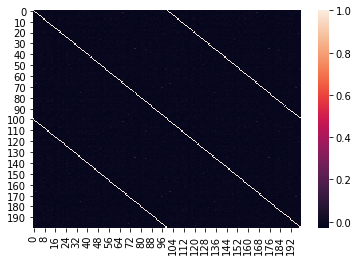

In [64]:
sns.heatmap(distance_matrix)

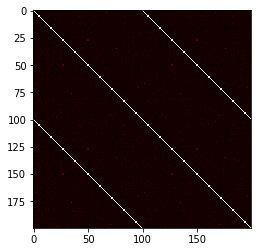

In [65]:
plt.imshow(distance_matrix, cmap='hot', interpolation='nearest')
plt.show()

In [66]:
YYY = Y

In [67]:
Z = np.zeros([199,4])
A = np.arange(0,200)
sz = np.ones(200)
cnt = 0
YYYY = YYY
def super_recursion():
    global YYY
    global A
    global sz
    global Z
    global cnt
    global YYYY
    if YYY.shape[0]==2:
        YYYY = YYY
    if YYY.shape[0]<=1:
        print(YYY)
        return ;
    sqa = np.square(YYY)
    sqa = np.sum(sqa,axis=1).tolist()
    square_roota = np.sqrt(sqa)
    YY=YYY/square_roota[:,None]
    distance_matrixa = YY.dot(YY.T)
    distance_matrixa = distance_matrixa.real
    np.fill_diagonal(distance_matrixa, -np.inf)
    i,j = np.unravel_index(distance_matrixa.argmax(),distance_matrixa.shape)
    one = YYY[i]
    two = YYY[j]
    avg = (one+two)/2.0
    Z[cnt,0] = A[i]
    Z[cnt,1] = A[j]
    Z[cnt,2] = distance_matrixa[i,j]
    Z[cnt,3] = sz[i] + sz[j]
    YYY[i] = avg
    YYY = np.delete(YYY,[j],axis=0)
    A[i] = cnt + 200
    A = np.delete(A,[j],axis=0)
    sz[i] = sz[i] + sz[j]
    sz = np.delete(sz,[j],axis=0)
    cnt+=1
    #print(YYY.shape)
    super_recursion()

In [68]:
super_recursion()

[[-7.84208771e-01+0.00000000e+00j -3.49770024e-01+0.00000000e+00j
   4.24419636e-01+0.00000000e+00j -6.49712679e-01+0.00000000e+00j
   9.32908425e-01+0.00000000e+00j -1.50479094e-01+0.00000000e+00j
   5.40679415e-01+0.00000000e+00j  2.08005595e-01+0.00000000e+00j
  -3.62858886e-01+0.00000000e+00j -6.14294147e-01+0.00000000e+00j
   6.29238772e-01+0.00000000e+00j -7.92630971e-01+0.00000000e+00j
   4.76975757e-01+0.00000000e+00j -3.20022841e-01+0.00000000e+00j
  -2.24877882e-01+0.00000000e+00j  4.23205577e-03+0.00000000e+00j
  -4.58716372e-01+0.00000000e+00j -2.84993317e-01+0.00000000e+00j
  -1.27091078e-01+0.00000000e+00j -3.95694742e-01+0.00000000e+00j
   3.61400896e-01+0.00000000e+00j  6.67408388e-01+0.00000000e+00j
  -1.41658286e-01+0.00000000e+00j -1.18664264e+00+0.00000000e+00j
   7.05306433e-01+0.00000000e+00j  9.53881619e-01+0.00000000e+00j
  -8.03876577e-01+0.00000000e+00j -1.15594921e+00+0.00000000e+00j
   5.39602669e-01+0.00000000e+00j -2.11238821e-01+0.00000000e+00j
   1.83480

In [69]:
Z.shape

(199, 4)

In [70]:
for i in range(0,Z.shape[0]):
    Z[i,2] = 1.0 - Z[i,2]

In [71]:
for i in range(0,Z.shape[0]):
    if(Z[i,2]<0):
        Z[i,2]=0

In [72]:
Z

array([[1.00000000e+00, 1.01000000e+02, 0.00000000e+00, 2.00000000e+00],
       [5.00000000e+01, 1.50000000e+02, 0.00000000e+00, 2.00000000e+00],
       [6.60000000e+01, 1.66000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.20000000e+01, 1.72000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.90000000e+01, 1.79000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.70000000e+01, 1.17000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+01, 1.20000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.10000000e+01, 1.21000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.40000000e+01, 1.24000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.80000000e+01, 1.28000000e+02, 0.00000000e+00, 2.00000000e+00],
       [3.30000000e+01, 1.33000000e+02, 0.00000000e+00, 2.00000000e+00],
       [3.70000000e+01, 1.37000000e+02, 0.00000000e+00, 2.00000000e+00],
       [3.80000000e+01, 1.38000000e+02, 0.00000000e+00, 2.00000000e+00],
       [8.00000000e+01, 1.80000000e+02, 0.00000000e

In [73]:
for i in range(0,Z.shape[0]):
    print("{}    {}   {}".format(Z[i,0],Z[i,1],Z[i,3]))

1.0    101.0   2.0
50.0    150.0   2.0
66.0    166.0   2.0
72.0    172.0   2.0
79.0    179.0   2.0
17.0    117.0   2.0
20.0    120.0   2.0
21.0    121.0   2.0
24.0    124.0   2.0
28.0    128.0   2.0
33.0    133.0   2.0
37.0    137.0   2.0
38.0    138.0   2.0
80.0    180.0   2.0
83.0    183.0   2.0
88.0    188.0   2.0
7.0    107.0   2.0
29.0    129.0   2.0
30.0    130.0   2.0
40.0    140.0   2.0
52.0    152.0   2.0
57.0    157.0   2.0
61.0    161.0   2.0
64.0    164.0   2.0
69.0    169.0   2.0
77.0    177.0   2.0
81.0    181.0   2.0
82.0    182.0   2.0
87.0    187.0   2.0
90.0    190.0   2.0
93.0    193.0   2.0
94.0    194.0   2.0
98.0    198.0   2.0
99.0    199.0   2.0
8.0    108.0   2.0
11.0    111.0   2.0
18.0    118.0   2.0
25.0    125.0   2.0
35.0    135.0   2.0
36.0    136.0   2.0
41.0    141.0   2.0
43.0    143.0   2.0
45.0    145.0   2.0
54.0    154.0   2.0
56.0    156.0   2.0
58.0    158.0   2.0
60.0    160.0   2.0
62.0    162.0   2.0
63.0    163.0   2.0
67.0    167.0   2.0
70.

In [74]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [75]:
Z[0]

array([  1., 101.,   0.,   2.])

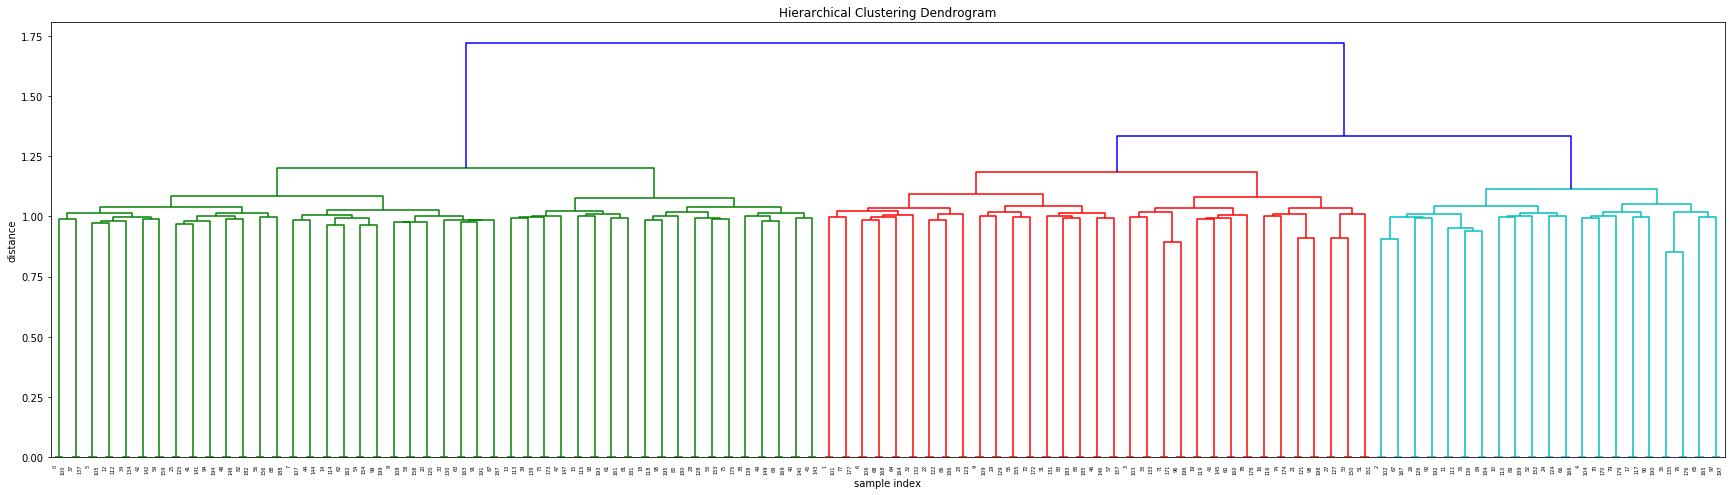

In [76]:
plt.figure(figsize=(30,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
   # leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [77]:
YYYY

array([[-7.84208771e-01+0.00000000e+00j, -3.49770024e-01+0.00000000e+00j,
         4.24419636e-01+0.00000000e+00j, -6.49712679e-01+0.00000000e+00j,
         9.32908425e-01+0.00000000e+00j, -1.50479094e-01+0.00000000e+00j,
         5.40679415e-01+0.00000000e+00j,  2.08005595e-01+0.00000000e+00j,
        -3.62858886e-01+0.00000000e+00j, -6.14294147e-01+0.00000000e+00j,
         6.29238772e-01+0.00000000e+00j, -7.92630971e-01+0.00000000e+00j,
         4.76975757e-01+0.00000000e+00j, -3.20022841e-01+0.00000000e+00j,
        -2.24877882e-01+0.00000000e+00j,  4.23205577e-03+0.00000000e+00j,
        -4.58716372e-01+0.00000000e+00j, -2.84993317e-01+0.00000000e+00j,
        -1.27091078e-01+0.00000000e+00j, -3.95694742e-01+0.00000000e+00j,
         3.61400896e-01+0.00000000e+00j,  6.67408388e-01+0.00000000e+00j,
        -1.41658286e-01+0.00000000e+00j, -1.18664264e+00+0.00000000e+00j,
         7.05306433e-01+0.00000000e+00j,  9.53881619e-01+0.00000000e+00j,
        -8.03876577e-01+0.00000000e+00

In [78]:
sqa = np.square(YYYY)
sqa = np.sum(sqa,axis=1).tolist()
square_roota = np.sqrt(sqa)
YY=YYYY/square_roota[:,None]

sqa1 = np.square(Y)
sqa1 = np.sum(sqa1,axis=1).tolist()
square_roota1 = np.sqrt(sqa1)
YY1=Y/square_roota1[:,None]

cluster_distance = YY.dot(YY1.T)
cluster_distance = cluster_distance.real
cluster_distance = 1 - cluster_distance
cluster_distance

array([[0.89695715, 1.05255716, 1.05560934, 1.05178868, 1.04951137,
        1.11938048, 1.17297753, 0.91206048, 1.04983524, 1.06208664,
        1.04568591, 0.90385354, 1.13488982, 1.05227772, 1.06166021,
        0.83569032, 1.0584996 , 0.84758984, 1.04170938, 1.13243533,
        0.91657644, 1.06940463, 1.05264295, 0.85075591, 0.88842014,
        1.11277199, 1.05875904, 1.06224537, 0.88935146, 1.06255405,
        0.89268935, 1.05557441, 1.06286534, 1.06060813, 1.05612233,
        0.85020954, 1.05000048, 0.90629585, 0.90073622, 1.04793134,
        0.87154655, 1.1049102 , 1.05594734, 0.9107196 , 0.93066268,
        1.13473549, 1.05866997, 0.53802238, 1.05307875, 1.05244112,
        1.05198868, 0.85650958, 0.89030852, 1.04768043, 1.03911774,
        1.06202949, 0.88796757, 1.05750789, 1.05366121, 1.05449307,
        1.05968018, 0.88368683, 1.05387145, 1.11612306, 1.13848211,
        0.86743622, 0.88610486, 1.05978926, 1.14997595, 1.04957244,
        1.04960551, 1.0618416 , 1.06545061, 0.90

In [79]:
sum1 = 0
sum2 = 0
cnt1 = 0
cnt2 = 0
arr = np.zeros(200)
for i in range(0,200):
    d1 = cluster_distance[0][i]
    d2 = cluster_distance[1][i]
    
    if d1<=d2:
        sum1+=d1
        cnt1+=1
        arr[i] = 0
    else:
        sum2+=d2
        cnt2+=1
        arr[i] = 1

In [80]:
r1 = np.sqrt(sum1/cnt1)
r2 = np.sqrt(sum2/cnt2)

In [81]:
r1

0.9837249758609518

In [82]:
r2

0.9728014515252568

In [83]:
cnt1

80

In [84]:
cnt2

120

In [85]:
c=0;
for i in range(100,200):
    if(arr[i]==0):
        c=c+1
    

In [86]:
c

40

In [87]:
label=pd.DataFrame(arr)

In [88]:
frame_with_labels= pd.concat([df,label],axis=1)

In [89]:
frame_with_labels

,text,0
0,"[rather, disappointing, mary, railly, stephen,...",0.0
1,"[look, back, times, life, fork, path, future, ...",1.0
2,"[must, tough, mob, boss, ask, paul, vitti, rob...",1.0
3,"[capsule, earthy, experimental, difficult, sho...",1.0
4,"[jim, henson, passed, away, left, behind, dive...",1.0
5,"[synopsis, movie, steven, spielberg, one, toda...",1.0
6,"[quiz, show, almost, perfectly, accurate, true...",1.0
7,"[first, thing, notice, movie, cold, placed, mi...",0.0
8,"[plot, group, asbestos, cleaners, get, job, re...",0.0
9,"[coen, brothers, back, time, homer, odyssey, b...",1.0
